In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import SpectralClustering, KMeans
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def generate_noisy_circles(n_samples_per_circle=300, noise=0.1):
    np.random.seed(0)
    X = []
    y = []
    radii = [1, 2, 3]
    for i, r in enumerate(radii):
        angles = np.linspace(0, 2 * np.pi, n_samples_per_circle, endpoint=False)
        angles += np.random.normal(scale=noise, size=n_samples_per_circle)
        xs = r * np.cos(angles) + np.random.normal(scale=noise, size=n_samples_per_circle)
        ys = r * np.sin(angles) + np.random.normal(scale=noise, size=n_samples_per_circle)
        X.append(np.stack((xs, ys), axis=1))
        y += [i] * n_samples_per_circle
    return np.vstack(X), np.array(y)

X, true_labels = generate_noisy_circles()

# Spectral Clustering
sc = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', assign_labels='kmeans', random_state=0)
spectral_labels = sc.fit_predict(X)

# KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_labels = kmeans.fit_predict(X)

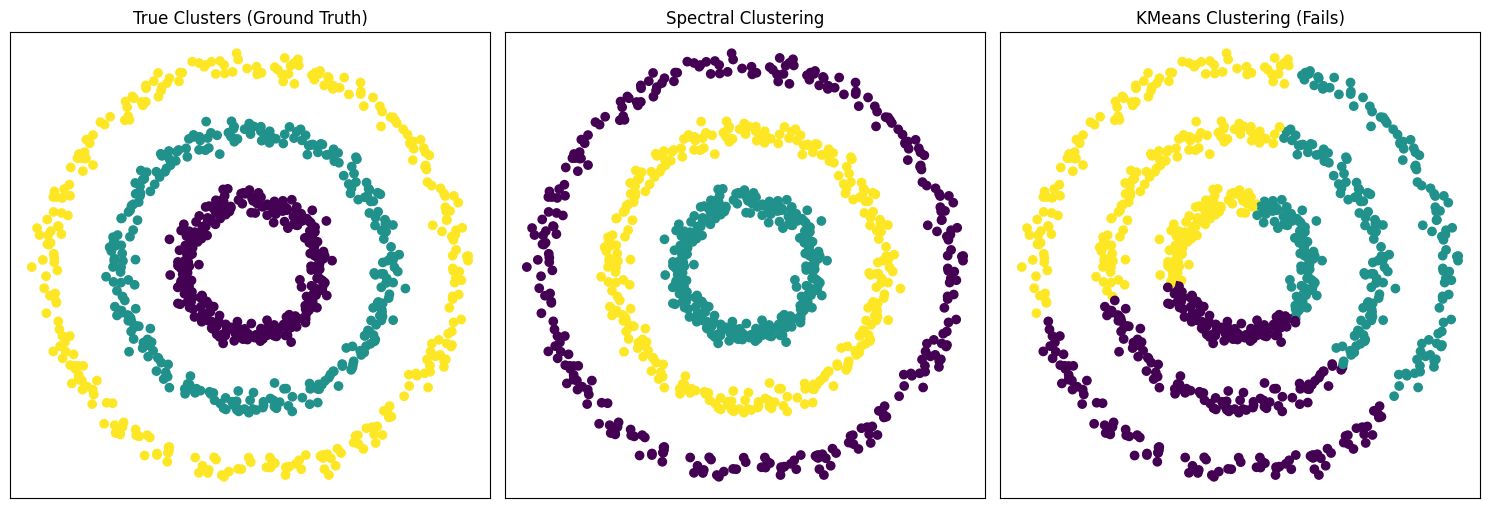

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(X[:, 0], X[:, 1], c=true_labels, cmap='viridis')
axes[0].set_title("True Clusters (Ground Truth)")

axes[1].scatter(X[:, 0], X[:, 1], c=spectral_labels, cmap='viridis')
axes[1].set_title("Spectral Clustering")

axes[2].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
axes[2].set_title("KMeans Clustering (Fails)")

for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')

plt.tight_layout()
plt.show()